# importing 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df=pd.read_csv('Data\Flipkart_Amazon Mobile Reviews.csv')

In [5]:
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23777 non-null  int64 
 1   Review-Title  23775 non-null  object
 2   rating        23777 non-null  object
 3   Review-Body   23160 non-null  object
 4   Product Name  23777 non-null  object
dtypes: int64(1), object(4)
memory usage: 928.9+ KB


# Exploring the data

In [7]:
df['Product Name'].unique()

array(['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ',
       'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Samsung Galaxy M32',
       'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'],
      dtype=object)

In [8]:
df['rating'].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [9]:
df['Product Name'].value_counts()

Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           4460
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              4330
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 3768
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    3570
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)            2724
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)      2166
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)      1419
Samsung Galaxy M32                                            1340
Name: Product Name, dtype: int64

In [10]:
df['Review-Body'].isnull().sum()

617

In [11]:
df['Review-Title'].isnull().sum()

2

In [12]:
#droping the empty rows
df=df.dropna()

In [13]:
df['Review-Body'].isnull().sum()

0

In [14]:
df['Review-Title'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23159 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23159 non-null  int64 
 1   Review-Title  23159 non-null  object
 2   rating        23159 non-null  object
 3   Review-Body   23159 non-null  object
 4   Product Name  23159 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


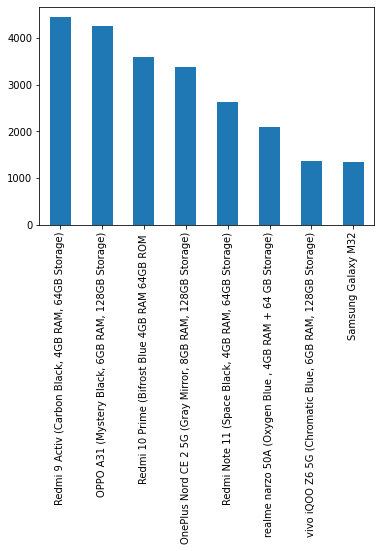

In [16]:
a=df['Product Name'].value_counts().plot.bar()

<AxesSubplot:xlabel='Product Name,rating'>

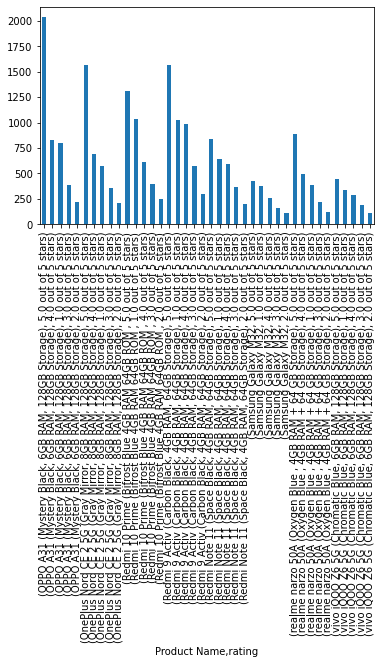

In [17]:
df.groupby('Product Name')['rating'].value_counts().plot.bar(stacked=True)

In [18]:
df.iloc[1593]

Unnamed: 0                                                   1610
Review-Title                    Awesome phone in reasonable price
rating                                         4.0 out of 5 stars
Review-Body     Battery life is decent, camera quality is good...
Product Name    OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...
Name: 1610, dtype: object

In [19]:
#droping the not required column
df = df.drop(columns=['Unnamed: 0'])

In [20]:
df

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,Warest mobile,1.0 out of 5 stars,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [21]:
df['rating']=df['rating'].str[0].astype(int)

In [22]:
df

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,Good mobile,4,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,Good camera,5,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [23]:
df.iloc[7][2]

'Phone is over all good but some heating problem,and selfie 🤳 is not too good.Other wise phone is good'

In [24]:
len(df['Review-Body'])

23159

In [25]:
# removing emojis
try:
    for i in range(len(df['Review-Body'])):
        emoj = re.compile("["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002500-\U00002BEF" 
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"
            u"\u3030""]+", re.UNICODE)
        
        df['Review-Body'][i]=(emoj.sub(r'', str(df['Review-Body'][i])))
        print(df['Review-Body'][i])
except KeyError:
    print(1)

Hang problem
I'm writing this review after using 3days !!!Be to honest this is normal Android phoneIt's not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery  backup ok !!! For one day normal use itsIf ur Gamer don't go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI'm first time buying OnePlusLittle disappointment
Camera is so good n very fast phone back look is awesomeWith dis price segment it's worth it n d most important thing is the phone has dedicated memory card slot I think dis is the first one plus phone which has d dedicated slot for memory cardBattery backup is also good n wit the help of 65w charger u can charge ur phone frm 50-100% in just 15 minsIt has the super vooc charger frm Dat u can charge ur phone very fastVery smooth touch n very fast phone u can play games with no lagInternet connectivity is also fast n lightning wit my Jio sim as u can c I hav pasted one photo showing d downloading sp

C:\Users\TOMKEN~1\AppData\Local\Temp/ipykernel_13256/1169684380.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review-Body'][i]=(emoj.sub(r'', str(df['Review-Body'][i])))


In [26]:
df['Review-Body'][7]

'Phone is over all good but some heating problem,and selfie  is not too good.Other wise phone is good'

In [27]:
df.iloc[7][2]

'Phone is over all good but some heating problem,and selfie  is not too good.Other wise phone is good'

In [28]:
df

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,Batten in this rangee,4,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,Good mobile,4,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,Good camera,5,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,Warest mobile,1,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [29]:
n=df['Product Name'].unique()

# on average which phone has higher rating

In [30]:
for i in n:
    print('mean of',i,'---',df.loc[df['Product Name'] == i, 'rating'].mean())

mean of OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage) --- 3.727620730270907
mean of OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage) --- 3.7231453311490754
mean of realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage) --- 3.6557142857142857
mean of Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM  --- 3.251042535446205
mean of Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) --- 3.398876404494382
mean of Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage) --- 3.291445874337623
mean of Samsung Galaxy M32 --- 3.180389221556886
mean of vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage) --- 3.2989010989010987


In [31]:
one_hot=pd.get_dummies(df['Product Name']).astype(int)
df=df.join(one_hot)

# NLP

In [32]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt') 
nltk.download('wordnet') 
nltk.download('stopwords') 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\tom
[nltk_data]     kentenich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\tom
[nltk_data]     kentenich\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\tom
[nltk_data]     kentenich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tom kentenich\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
#removing special charaters
df['Review-Title'] = df['Review-Title'].str.replace("[^a-zA-Z0-9]", " ")
df['Review-Body'] = df['Review-Body'].str.replace("[^a-zA-Z0-9]", " ")

C:\Users\TOMKEN~1\AppData\Local\Temp/ipykernel_13256/3494460198.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review-Title'] = df['Review-Title'].str.replace("[^a-zA-Z0-9]", " ")
C:\Users\TOMKEN~1\AppData\Local\Temp/ipykernel_13256/3494460198.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review-Body'] = df['Review-Body'].str.replace("[^a-zA-Z0-9]", " ")


In [34]:
lst2=['Review-Title','Review-Body']
for i in lst2:
    df[i] = df[i].replace("[^a-zA-Z0-9]", " ")
    df[i] = [review.lower() for review in df[i]]

In [35]:
# removing stop words
lst2=['Review-Title','Review-Body']
for i in lst2:
    stop_words = stopwords.words('english')
    df[i] = df[i].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

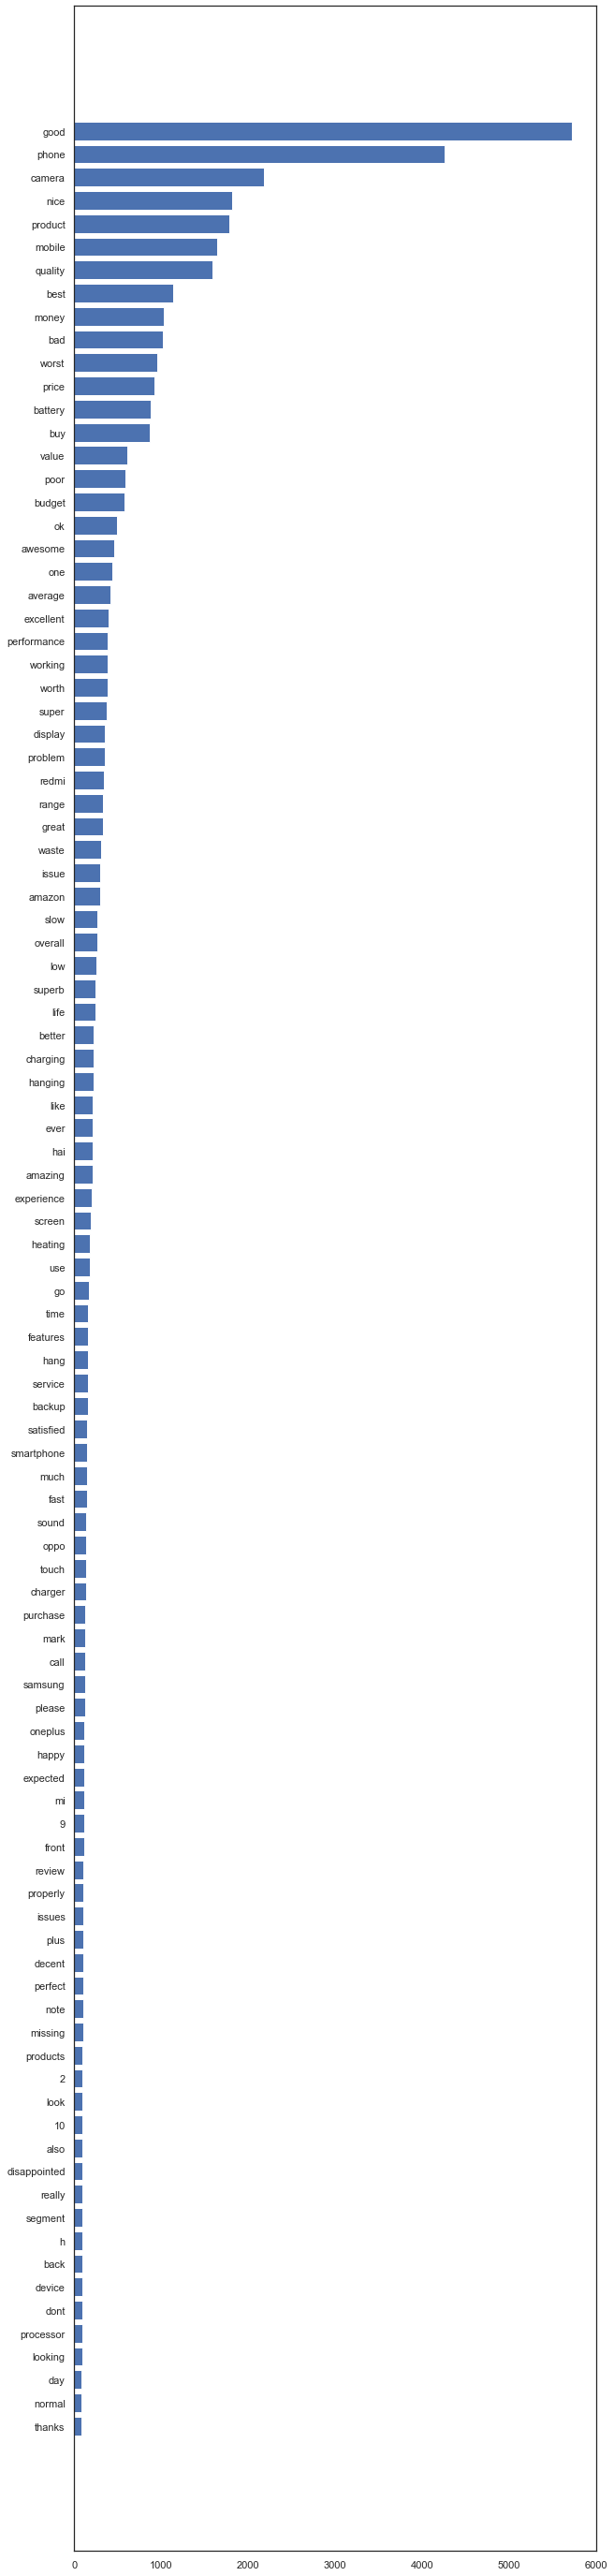

In [36]:
#checking for frequently repeated words
from nltk import FreqDist
sns.set(style = 'white')

all_words = ' '.join([text for text in df['Review-Title']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 100) 
words_df.sort_values('count', inplace = True)

plt.figure(figsize=(10,50))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

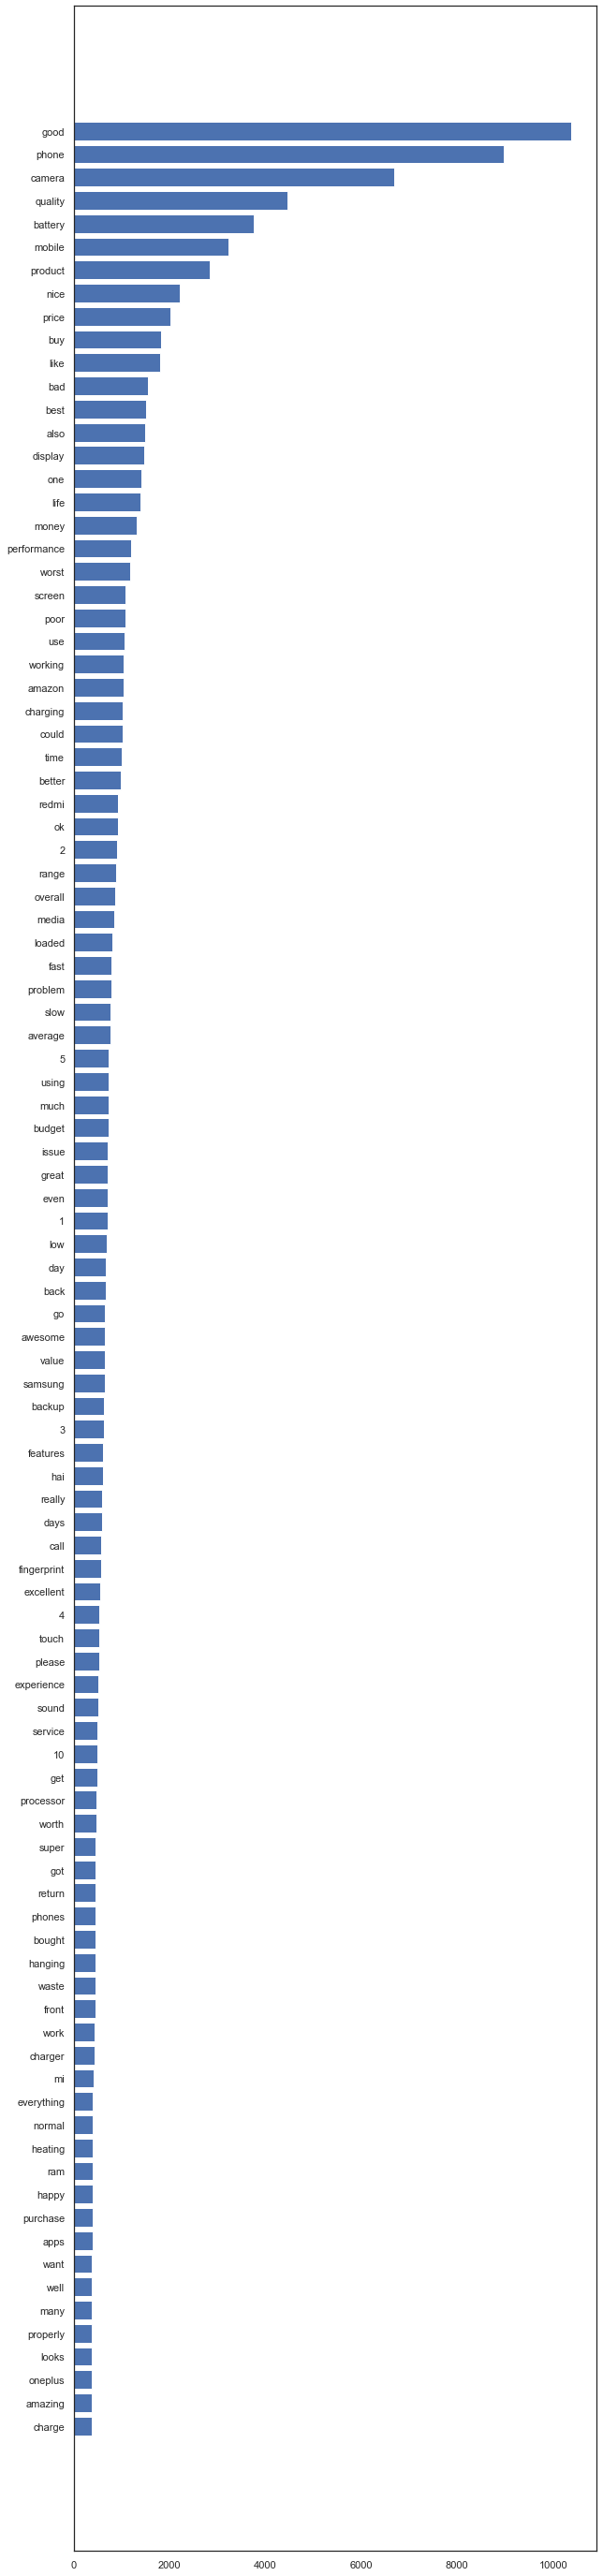

In [37]:
sns.set(style = 'white')

all_words = ' '.join([text for text in df['Review-Body']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 100) 
words_df.sort_values('count', inplace = True)

plt.figure(figsize=(10,50))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [38]:
#Function for removing stopwords
add_words = ['phone','product','working','overall','hai','go','use','features','oppo','samsung','oneplus','vivo',"mi","9","properly","review","&","note","products","2","10","also","h","device","looking","normal","1","issue","observed","product","also","one","life","5","1"]
stop_words.extend(add_words)

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new


df['Review-Body'] = [remove_stopwords(r) for r in df['Review-Body']]
df['Review-Title'] = [remove_stopwords(r) for r in df['Review-Title']]

In [39]:
#apliying Tfidf
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(df['Review-Body']).toarray()
featureNames = tfidf.get_feature_names()
X11=pd.DataFrame(X1, columns = featureNames)

tfidf = TfidfVectorizer(max_features=5000)
X2 = tfidf.fit_transform(df['Review-Title']).toarray()
featureNames = tfidf.get_feature_names()
X22=pd.DataFrame(X2, columns = featureNames)

In [40]:
df2=df

In [41]:
df2

,Review-Title,rating,Review-Body,Product Name,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)","OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)","Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",Samsung Galaxy M32,"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)","vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)"
0,worst ever,1,hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,1,0,0,0,0,0,0
1,ok mark,2,writing using 3days honest android phoneit lik...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,1,0,0,0,0,0,0
2,awesome look,5,camera good n fast back look awesomewith dis p...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,1,0,0,0,0,0,0
3,plus losing originality,3,media could loaded average decent day day acti...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,1,0,0,0,0,0,0
4,read,1,got delivery 23 feb unboxed display damaged re...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23772,batten rangee,4,must bhai iss range bas cemra thoda sa shi nhi,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0,0,0,0,0,0,0,1
23773,good mobile,4,good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0,0,0,0,0,0,0,1
23774,good camera,5,good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0,0,0,0,0,0,0,1
23775,warest mobile,1,buy mobile money weast screen tach problem cam...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0,0,0,0,0,0,0,1


In [42]:
df=df.drop(['Review-Body','Review-Title','Product Name'],axis=1)

In [43]:
df

,rating,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)","OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)","Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",Samsung Galaxy M32,"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)","vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)"
0,1,0,1,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0
2,5,0,1,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
23772,4,0,0,0,0,0,0,0,1
23773,4,0,0,0,0,0,0,0,1
23774,5,0,0,0,0,0,0,0,1
23775,1,0,0,0,0,0,0,0,1


In [44]:
df[:]

,rating,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)","OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)","Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",Samsung Galaxy M32,"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)","vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)"
0,1,0,1,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0
2,5,0,1,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
23772,4,0,0,0,0,0,0,0,1
23773,4,0,0,0,0,0,0,0,1
23774,5,0,0,0,0,0,0,0,1
23775,1,0,0,0,0,0,0,0,1


In [45]:
X=pd.DataFrame(np.hstack([X11,X22,df]))  
y=df['rating']

In [46]:
# taking less values to reduce totol time
X=X[:10000]
y=y[:10000]

# Spliting the data

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(max_depth=70)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_train)

In [56]:
l2=pd.DataFrame({'actual value':y_train,'predicted vaule':y_pred})
l2.head(15)

,actual value,predicted vaule
8319,5,5
9032,1,1
568,1,1
4067,1,1
1666,1,1
502,3,3
957,5,5
555,5,5
684,1,1
2717,5,5


In [58]:
from sklearn.metrics import r2_score
print('the R2 score of Random forest Regression : ',r2_score(y_train,y_pred))

the R2 score of Random forest Regression :  0.9629143206046005
